In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\fandi\Anaconda3\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv('rating.csv')
df2=pd.read_csv('anime.csv')

In [3]:
df2['genre']=df2['genre'].str.split(',')

In [4]:
result = df.pivot_table(index='anime_id', 
                        columns='user_id', 
                        values='rating')
result.columns.name = None


In [ ]:
result=result.fillna(0)

In [ ]:
result

In [ ]:
no_user_voted = df.groupby('anime_id')['rating'].agg('count')
no_anime_voted = df.groupby('user_id')['rating'].agg('count')

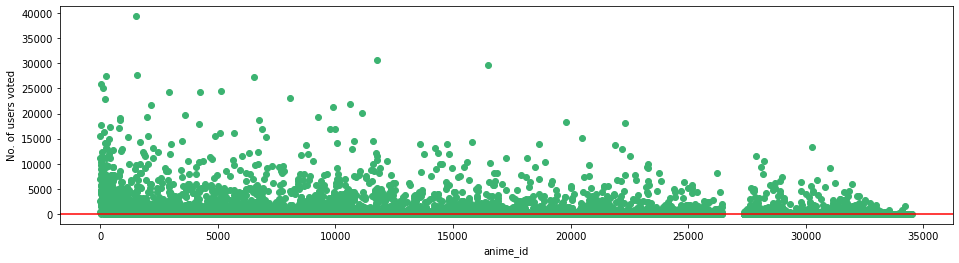

In [9]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('anime_id')
plt.ylabel('No. of users voted')
plt.show()

In [10]:
final_dataset = result.loc[no_user_voted[no_user_voted > 10].index,:]

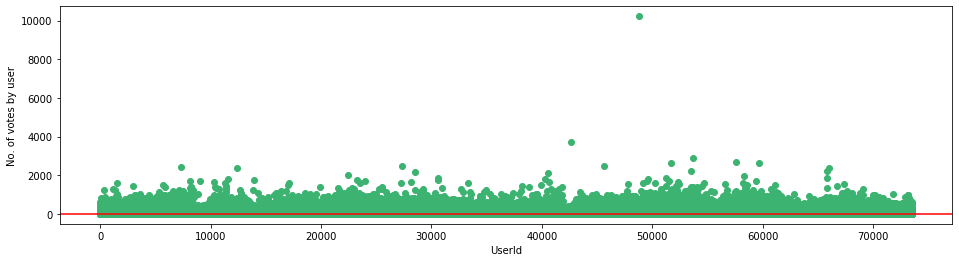

In [11]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_anime_voted.index,no_anime_voted,color='mediumseagreen')
plt.axhline(y=20,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [12]:
final_dataset=final_dataset.loc[:,no_anime_voted[no_anime_voted > 20].index]

In [13]:
final_dataset=final_dataset.reset_index()

In [14]:
final_dataset

user_id  anime_id    1    3    4    5    6    7   11   12   13  ...  73499  \
0               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0  ...    9.0   
1               5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0  ...    0.0   
2               6  0.0  0.0 -1.0  8.0  0.0  0.0  0.0  0.0 -1.0  ...    9.0   
3               7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4               8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
7653        34238  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
7654        34240  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
7655        34283  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
7656        34324  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
7657        34325  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

user_id  73500  73501  73502  73503  73504  73507  73510  73513  73515  
0          0.0    0.0    0.0    9.0   10.0    9.0    0.0    9.0   10.0  
1          0.0    0.0    0.0    7.0   10.0    8.0    0.0    8.0   10.0  
2          0.0    0.0    0.0    9.0    9.0    9.0    0.0    0.0   10.0  
3          0.0    0.0    9.0    0.0    7.0    0.0    0.0    0.0    0.0  
4          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
...        ...    ...    ...    ...    ...    ...    ...    ...    ...  
7653       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
7654       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
7655       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
7656       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
7657       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[7658 rows x 53533 columns]

In [15]:
final_dataset.index

RangeIndex(start=0, stop=7658, step=1)

In [16]:
matrix_data = csr_matrix(final_dataset.values)

In [17]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(matrix_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [32]:
def get_anime_recommendation(name):
    anime_recommend_n = 10
    anime_list = df2[df2['name'].str.contains(name)]  
    if len(anime_list):        
        anime_idx= anime_list.iloc[0]['anime_id']
        
        anime_idx = final_dataset[final_dataset['anime_id'] == anime_idx].index[0]
        distances , indices = knn.kneighbors(matrix_data[anime_idx],n_neighbors=anime_recommend_n+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            
            anime_idx = final_dataset.iloc[val[0]]['anime_id']
            idx =df2[df2['anime_id'] ==anime_idx].index
            
            recommend_frame.append({'name':df2.iloc[idx]['name'].values[0],'Distance':val[1],'Genre':df2.iloc[idx]['genre'].values[0][0],'Type':df2.iloc[val[0]]['type'],'Rating':df2.iloc[val[0]]['rating']})
        df = pd.DataFrame(recommend_frame,index=range(1,anime_recommend_n+1))
        return df.sort_values(by=['Distance'], ascending=True)
    else:
        return "No movies found. Please check your input"

In [30]:
df2[df2['name'].str.contains('Kimi no Na wa.')].iloc[0]


anime_id                                        32281
name                                   Kimi no Na wa.
genre       [Drama,  Romance,  School,  Supernatural]
type                                            Movie
episodes                                            1
rating                                           9.37
members                                        200630
Name: 0, dtype: object

In [20]:
#final_dataset[final_dataset['user_id'] == 32281].index[0]

In [21]:
df2.iloc[6799]['type']

'OVA'

In [22]:
get_anime_recommendation('Fullmetal Alchemist: Brotherhood')

name  Distance   Genre     Type  Rating
1       Deadman Wonderland  0.024717  Action  Special    6.76
2             Angel Beats!  0.024417  Action      OVA    6.79
3                Fate/Zero  0.024156  Action       TV    6.57
4         Mirai Nikki (TV)  0.024048  Action      OVA    6.52
5   Highschool of the Dead  0.023957  Action  Special    6.69
6               Durarara!!  0.023731  Action    Movie    6.78
7           Ao no Exorcist  0.023569  Action    Movie    6.58
8       Shingeki no Kyojin  0.023133  Action  Special    6.28
9         Sword Art Online  0.022383  Action      OVA    6.46
10             Steins;Gate  0.021929  Sci-Fi      ONA    6.63

In [23]:
import ipywidgets as widgets
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
input_text =widgets.Text(
    value='',
    placeholder='Please enter Anime Name (ง ͡❛ ͜ʖ ͡❛)ง',
    description='String:',
    disabled=False
)
btn = widgets.Button(description='Search!')
out = widgets.Output(layout={'border': '1px solid black'})
display(input_text)
display(btn)
display(out)
def callback(wdgt):
    # replace by something useful
    global dummy
    out.clear_output()
    dummy = get_anime_recommendation(input_text.value)
    with out:
        display(dummy)

btn.on_click(callback)

NameError: name 'widgets' is not defined